## Automaded Dialogue Games

### Authors: Stefan Sarkadi and Ionut Moraru
#### AAAI2020

Two agents, Deceiver (DEC), and an Interrogator (INT) take part in a dialogue game based on a World Graph (WG). Both agents have a knowledge base (KB) and a Theory of Mind of each other (ToM). The goal of DEC $G_{Dec}$ is to make INT infer the wrong color of the nodes that make up the WG.

The social parameters that influence the interaction between the two agents are the following:

1) Trust

2) Cognitive Load

3) Communicative skill (Cognitive resources)

4) Rewards for both agents + rewards calculated by the game

The actions that INT can perform are accept/reject argument provided by DEC, ask DEC about colour of a node.

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
class Deceiver(object):
    KB = nx.Graph()
    carac = pd.DataFrame()
    ToM = pd.DataFrame()
    Goal = []
    TrustOfINT = 0 
    Win = False
    
#   Initializer for the Deceiver class
    def __init__(self, KB, carac, ToM, Goal, TrustOfINT):
        self.KB = KB
        self.carac = carac 
        self.ToM = ToM
        self.Goal = Goal
        self.TrustOfINT = TrustOfINT
        
#   In this method, the Deceiver will respond to the querry about a node by returning the dict with a color attribute
    def respondToINT(self, name):

        return self.carac[self.carac['ID'] == name]['name'].iloc[0]
    
    def receiveAcceptance(self, accept):
        # Proces and update all the values depending on the truth value of the Acceptance. 
        # Ask stefan what needs to be updated when
        if accept:
            print('accept')
        else:
            print('reject')
        
    def SimulateToM(self):
        # functie de la PG3 paper
        return True
            
    def checkGoal(self):
        # check if Goal condition is satisfied with the current ToM.
        return True
        
        

In [112]:
class Interogator(object):
    KB = nx.Graph()
    carac = pd.DataFrame()
    ToM = pd.DataFrame()
    TrustOfDEC = 0 
    Complete = False
    
    def __init__(self, KB, ToM, TrustOfDEC, Complete = False):
        self.KB = KB
        self.carac = ToM
#         self.ToM = ToM
        self.TrustOfDEC = TrustOfDEC
        self.Complete = Complete
#         print(self.carac)
        
    def askDEC(self, ID):
        # select node from open list and interogate DEC for its attribute
        
        return ID
        
    # check in TS if the color of the node returned is valid and if trust is passable
    def verifyResponse(self, name, ID):
        if self.TrustOfDEC>=5:
            accept = True
#             test.IntCarac.at[test.IntCarac[test.IntCarac["ID"]=="TM"].index[0], "name"]= "timi"

            
            self.carac.at[self.carac[self.carac['ID'] == ID].index[0], 'name'] = name
            
            print(self.carac)
            
        
            
        return accept

        
#         parent = self.KB.predecessors()
        
#         attributes = (node, nx.get_node_attributes(self.KB, parent))
                
#         for trans in TS:
#             # check if the response color is concuring to the current TS, if yes, then change accept to True.
#             print(trans)
#             if (trans[0] == attributes[0]) and (trans[1] == attributes[1]):
#                 accept = True
#                 self.TrustOfDEC +=1
        
#         if accept == False:
#             if self.TrustOfDEC >5:
#                 accept = True
            
    
    def SimulateToM(self):
        # functie de la PG3 paper
        return True
    
    def coloringFunction(self):
        return True
        #based on the CogRes, simulate and give colors to the next nodes in the WG
        
    
        

In [105]:
class Game(object):
    
    WG = nx.DiGraph()
    carac = pd.DataFrame()
    IntCarac = pd.DataFrame()
    startingNode = ''
    order = []
    
    def __init__(self, WGpd, carac, startingNode):
        self.WG = nx.from_pandas_edgelist(WGpd, 'from', 'to', create_using=nx.Graph())
        
        self.carac = carac
        self.characteristic = carac
        self.carac = self.carac.set_index('ID')
        self.carac = self.carac.reindex(self.WG.nodes())
        self.carac['name']=pd.Categorical(self.carac['name'])
        self.carac['name'].cat.codes
    
        self.IntCarac = self.characteristic.copy(deep=True)
        self.IntCarac['name'] = self.IntCarac['name'].replace(['Timisoara','Arad','Oradea','Cluj',
                                       'SatuMare','Deva','Drobeta','Craiova','Pitesti',
                                       'AlbaIulia','Sibiu','TarguMures','Brasov','Suceava',
                                       'Iasi','Bacau','Bucuresti','Ploiesti','Focsani','Buzau',
                                       'Galati','Tulcea','Constanta','VamaVeche','Slobozia'], 'empty')
        
        self.startingNode = startingNode
        self.finished = False
        index = 1
        self.order = []
        self.order.append((startingNode, 0))
        for i in list(nx.bfs_edges(self.WG, self.startingNode)):
            self.order.append((i[1],index))
            index += 1
            
    def initGame(self, trust, beliefTrust):
        self.batman = Interogator(self.WG, self.IntCarac, trust)
        self.joker = Deceiver(self.WG, self.characteristic, self.IntCarac, 'empty', beliefTrust)
        
    def play(self):
        self.initGame(5,5)
        index = 0
#         self.initGame(5,5)
        
        while(index <= self.order[-1][1]):
            ID = self.order[index][0]
            
            self.joker.receiveAcceptance(self.batman.verifyResponse(
                self.joker.respondToINT(self.batman.askDEC(ID)), ID))
            index += 1
            
            
        
    def showWG(self):
        nx.draw_kamada_kawai(self.WG, with_labels=True,
                             node_color=self.carac['name'].cat.codes, cmap=plt.cm.RdYlBu_r, node_size=1000)
    

In [113]:
rom = pd.DataFrame({
    'from':['TM' ,'TM','TM','AR','AR','OR','DTS','DV','DV','CJ','CJ','CJ' ,'CJ','AI','CV' ,'SB' ,'SB','TGM','PiT','BV','BV','PL','SV','SV','IS','BC','FC','FC','BZ','BZ','GL','TL','CT','CT'],
      'to':['DTS','AR','DV','OR','DV','CJ', 'CV','CV','AI','SM','SV','TGM','AI','SB','PiT','PiT','BV','BV' ,  'B','BC','PL', 'B','IS','BC','BC','FC','BZ','GL', 'B','SL','TL','CT','SL','VV']
})
city = pd.DataFrame({
    'ID'  :['TM'       ,'AR'  ,'OR'    ,'CJ'  ,'SM'      ,'DV'  ,'DTS'    ,'CV'     ,'PiT'    ,'AI'       ,'SB'   ,'TGM'       ,'BV'    ,'SV'     ,'IS'  ,'BC'   ,'B'        ,'PL'      ,'FC'     ,'BZ'   ,'GL'    ,'TL'    ,'CT'       ,'VV'       ,'SL'      ]                                                   ,
    'name':['Timisoara','Arad','Oradea','Cluj','SatuMare','Deva','Drobeta','Craiova','Pitesti','AlbaIulia','Sibiu','TarguMures','Brasov','Suceava','Iasi','Bacau','Bucuresti','Ploiesti','Focsani','Buzau','Galati','Tulcea','Constanta','VamaVeche','Slobozia']
})


test = Game(rom, city, 'TM')



In [114]:
# test.batman
# test.IntCarac.at[test.IntCarac[test.IntCarac["ID"]=="TM"].index[0], "name"]= "timi"
test.play()

     ID       name
0    TM  Timisoara
1    AR      empty
2    OR      empty
3    CJ      empty
4    SM      empty
5    DV      empty
6   DTS      empty
7    CV      empty
8   PiT      empty
9    AI      empty
10   SB      empty
11  TGM      empty
12   BV      empty
13   SV      empty
14   IS      empty
15   BC      empty
16    B      empty
17   PL      empty
18   FC      empty
19   BZ      empty
20   GL      empty
21   TL      empty
22   CT      empty
23   VV      empty
24   SL      empty
accept
     ID       name
0    TM  Timisoara
1    AR      empty
2    OR      empty
3    CJ      empty
4    SM      empty
5    DV      empty
6   DTS    Drobeta
7    CV      empty
8   PiT      empty
9    AI      empty
10   SB      empty
11  TGM      empty
12   BV      empty
13   SV      empty
14   IS      empty
15   BC      empty
16    B      empty
17   PL      empty
18   FC      empty
19   BZ      empty
20   GL      empty
21   TL      empty
22   CT      empty
23   VV      empty
24   SL      empty
accep

In [103]:
test.IntCarac

,ID,name
0,TM,timi
1,AR,empty
2,OR,empty
3,CJ,empty
4,SM,empty
5,DV,empty
6,DTS,empty
7,CV,empty
8,PiT,empty
9,AI,empty


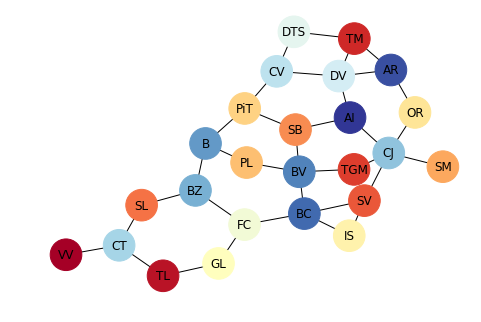

In [44]:
test.showWG()
# test.testWG()

In [69]:
print(list(nx.bfs_edges(test.WG, test.startingNode)))

[('TM', 'DTS'), ('TM', 'DV'), ('TM', 'AR'), ('DTS', 'CV'), ('DV', 'AI'), ('AR', 'OR'), ('CV', 'PiT'), ('AI', 'CJ'), ('AI', 'SB'), ('PiT', 'B'), ('CJ', 'TGM'), ('CJ', 'SM'), ('CJ', 'SV'), ('SB', 'BV'), ('B', 'BZ'), ('B', 'PL'), ('SV', 'IS'), ('SV', 'BC'), ('BZ', 'FC'), ('BZ', 'SL'), ('FC', 'GL'), ('SL', 'CT'), ('GL', 'TL'), ('CT', 'VV')]


In [70]:
print(list(nx.bfs_predecessors((test.WG), 'TM')))

[('DTS', 'TM'), ('DV', 'TM'), ('AR', 'TM'), ('CV', 'DTS'), ('AI', 'DV'), ('OR', 'AR'), ('PiT', 'CV'), ('CJ', 'AI'), ('SB', 'AI'), ('B', 'PiT'), ('TGM', 'CJ'), ('SM', 'CJ'), ('SV', 'CJ'), ('BV', 'SB'), ('BZ', 'B'), ('PL', 'B'), ('IS', 'SV'), ('BC', 'SV'), ('FC', 'BZ'), ('SL', 'BZ'), ('GL', 'FC'), ('CT', 'SL'), ('TL', 'GL'), ('VV', 'CT')]


In [23]:
x = nx.bfs_successors((test.WG), 'TM')

In [10]:
test.IntCarac

,ID,name
0,TM,empty
1,AR,empty
2,OR,empty
3,CJ,empty
4,SM,empty
5,DV,empty
6,DTS,empty
7,CV,empty
8,PiT,empty
9,AI,empty


In [7]:
test.order

[('TM', 0),
 ('DTS', 1),
 ('DV', 2),
 ('AR', 3),
 ('CV', 4),
 ('AI', 5),
 ('OR', 6),
 ('PiT', 7),
 ('CJ', 8),
 ('SB', 9),
 ('B', 10),
 ('TGM', 11),
 ('SM', 12),
 ('SV', 13),
 ('BV', 14),
 ('BZ', 15),
 ('PL', 16),
 ('IS', 17),
 ('BC', 18),
 ('FC', 19),
 ('SL', 20),
 ('GL', 21),
 ('CT', 22),
 ('TL', 23),
 ('VV', 24)]